## reading the dataset

In [1]:
import pandas as pd

# Giving the path of the CSV file and stored in a variable name file
file = "C:\\Users\\pbhar\\restaurent reviews.csv"

# Reading the CSV file and stored in a variable named called dataframe(df)
df = pd.read_csv(file)

# Printing the first 20 rows of the data from the CSV file
df.head(20)

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...
5,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,5/1/2019,I've been coming to this ice cream stand since...
6,https://www.yelp.com/biz/sidney-dairy-barn-sidney,1,8/11/2016,The soft-serve is way too sweet and has a stra...
7,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,11/5/2016,My husband and I stopped here on the way back ...
8,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/19/2015,"Little piece of heaven, the best ice cream sho..."
9,https://www.yelp.com/biz/sidney-dairy-barn-sidney,2,7/26/2019,Went here for the 1st time tonight. I ordered ...


## useing regex to remove stop words

In [3]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

In [52]:
import regex as re

def tokenize(text):
    return re.findall(r'https?:\/\/\S+', text)
    

## example for regex

In [51]:
#Toknizing the Given Text
testtext = "All I can say is they have very good ice cream! https://www.yelp.com/biz/sidney-dairy-barn-sidney"
testtokens = tokenize(testtext)
print(testtokens)

['All', 'I', 'can', 'say', 'is', 'they', 'have', 'very', 'good', 'ice', 'cream', 'https', 'www', 'yelp', 'com', 'biz', 'sidney-dairy-barn-sidney']


## colums

In [30]:
# Prinitng the column names for an overview
df.columns

Index(['Yelp URL', 'Rating', 'Date', 'Review Text', 'tokens', 'num_tokens'], dtype='object')

## Datatypes

In [31]:
# Printing the data types of the columns
df.dtypes

Yelp URL       object
Rating          int64
Date           object
Review Text    object
tokens         object
num_tokens      int64
dtype: object

## infomation

In [32]:
# Printing the information for an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Yelp URL     19896 non-null  object
 1   Rating       19896 non-null  int64 
 2   Date         19896 non-null  object
 3   Review Text  19896 non-null  object
 4   tokens       19896 non-null  object
 5   num_tokens   19896 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 932.8+ KB


## Describe

In [33]:
# Describing the data of the CSV File
df.describe()

,Rating,num_tokens
count,19896.000000,19896.000000
mean,4.130830,46.277644
std,1.200746,39.726464
min,1.000000,1.000000
25%,4.000000,20.000000
50%,5.000000,35.000000
75%,5.000000,59.000000
max,5.000000,625.000000


## Length of Review text

In [34]:
# Adding a new column with the length of the “Entity” column
df['length'] = df['Review Text'].str.len()

# Describing the output
df.describe()

,Rating,num_tokens,length
count,19896.000000,19896.000000,19896.000000
mean,4.130830,46.277644,493.933353
std,1.200746,39.726464,433.011039
min,1.000000,1.000000,7.000000
25%,4.000000,20.000000,208.000000
50%,5.000000,35.000000,365.000000
75%,5.000000,59.000000,636.000000
max,5.000000,625.000000,5990.000000


## upper for review text

In [35]:
df['Review Text'] = df['Review Text'].str.upper()
df

,Yelp URL,Rating,Date,Review Text,tokens,num_tokens,length
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,ALL I CAN SAY IS THEY HAVE VERY GOOD ICE CREAM...,"[say, good, ice, cream, would, sure, recommend...",12,123
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,NICE LITTLE LOCAL PLACE FOR ICE CREAM.MY FAVOR...,"[nice, little, local, place, ice, cream, favor...",31,290
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A DELICIOUS TREAT ON A HOT DAY! STAFF WAS VERY...,"[delicious, treat, hot, day, staff, friendly, ...",16,131
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,THIS WAS GREAT SERVICE AND A FUN CREW! I GOT T...,"[great, service, fun, crew, got, banana, cream...",38,374
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,THIS IS ONE OF MY FAVORITE PLACES TO GET ICE C...,"[one, favorite, places, get, ice, cream, cu, a...",81,848
...,...,...,...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,HAD THE CHOCOLATE CANNOLI! THE FILLING WAS RIC...,"[chocolate, cannoli, filling, rich, delicious,...",11,120
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,LOVE APRICOT CROISSANT! I BOUGHT IT AT 4:00 PM...,"[love, apricot, croissant, bought, pm, normall...",32,352
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,LINE WAS ABOUT 25 PEOPLE LONG. IT WENT FAST! T...,"[line, people, long, went, fast, variety, past...",34,356
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,ITS HARD NOT TO ORDER EVERYTHING WHEN I COME H...,"[hard, order, everything, come, good, also, or...",14,168


## pipeline

In [5]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['Review Text'].apply(prepare, pipeline=pipeline)


In [28]:
##running pipeline
df['tokens'] = df['Review Text'].apply(prepare,pipeline=pipeline)
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,Yelp URL,Rating,Date,Review Text,tokens,num_tokens
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...,"[chocolate, cannoli, filling, rich, delicious,...",11
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...,"[love, apricot, croissant, bought, pm, normall...",32
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...,"[line, people, long, went, fast, variety, past...",34
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...,"[hard, order, everything, come, good, also, or...",14
19895,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,9/3/2019,Every mall needs an Eataly for real. La Pastic...,"[every, mall, needs, eataly, real, la, pasticc...",59


In [9]:
# Checking for missing data
df.isna().sum()

Yelp URL       0
Rating         0
Date           0
Review Text    0
tokens         0
dtype: int64

<Axes: >

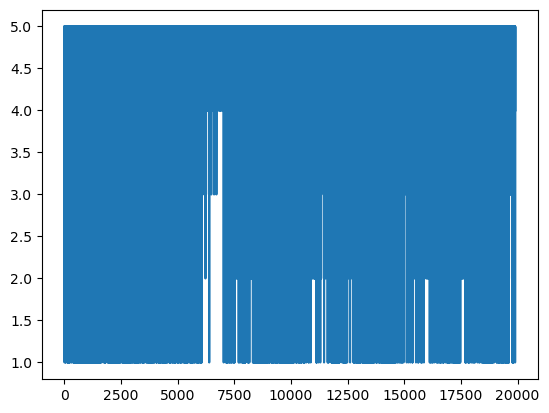

In [11]:
# Plotting the Graph
df['Rating'].plot()

<Axes: >

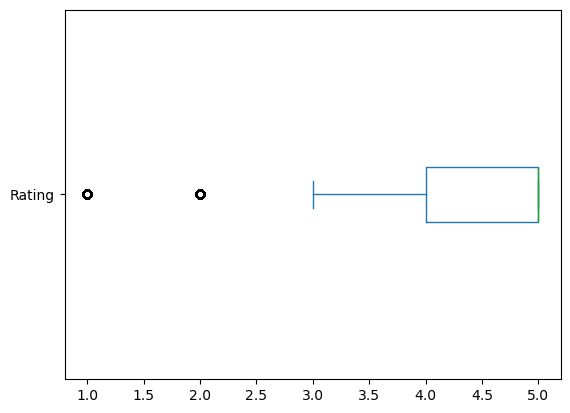

In [12]:
# Plotting the length graph in a kind of box in the horizontal position 
df['Rating'].plot(kind='box', vert=False)

<Axes: ylabel='Frequency'>

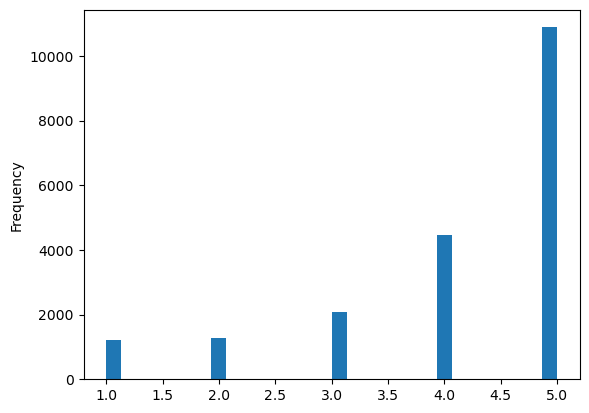

In [13]:
# Plotting the histogram Graph labelling Y-axis as Frequency
df['Rating'].plot(kind='hist', bins=30)

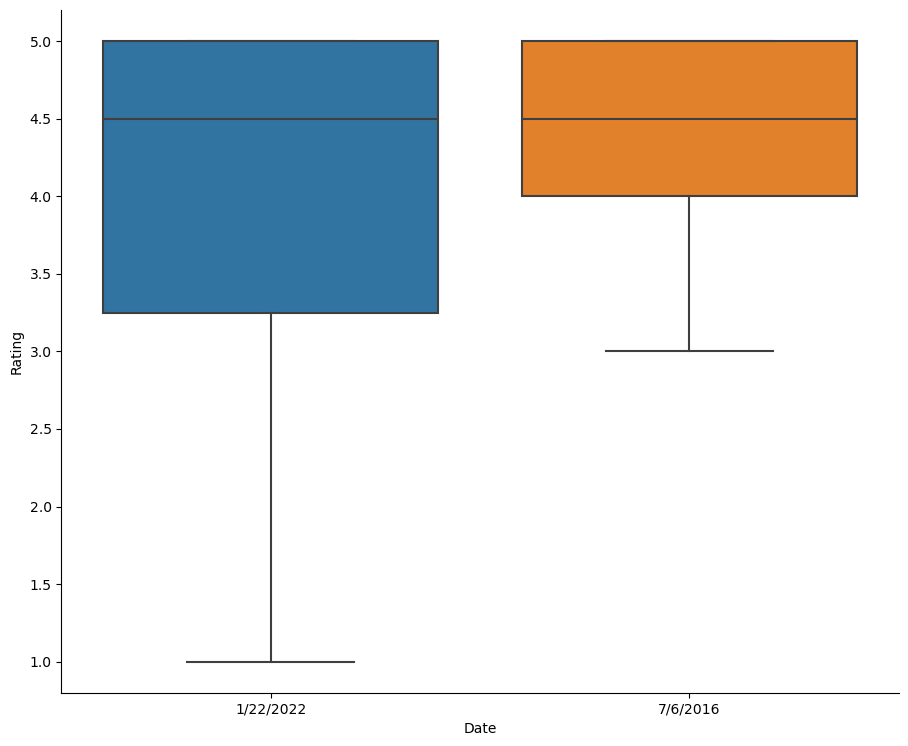

In [22]:
# Printing the Bar Plot taking X-axis as 'Code' and Y-axis as 'Length'
import seaborn as sns
where = df['Date'].isin(['1/22/2022', '7/6/2016'])
g = sns.catplot(data=df[where], x="Date", y="Rating", kind='box')
g.fig.set_size_inches(10, 8) 

In [41]:
# Tokenizing a Function using a function tokenize()
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

x = tokenize('Bhargavi Prodduturi')
print(x)

['Bhargavi', 'Prodduturi']


In [42]:
# We will use the list of English stop words that are standard in python
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'y', 'under', 'shan', 'in', 'it', 'there', 'its', 'was', 'where', 'than', 'myself', 'wouldn', 'mustn', 'out', 'ain', 'down', 'from', 'why', 'when', 'what', "mightn't", 'wasn', 'before', "weren't", 'doing', 'm', 'as', 'to', 'ma', "you'll", "you're", "it's", 'only', 'will', 'further', 'then', 'he', 'each', 'been', 'their', 'don', 'doesn', 'any', 'that', 'both', 'if', 'themselves', 'some', 'off', 'few', 'mightn', 'no', 'aren', 'and', 'these', 'same', 'does', "that'll", 'while', 'ours', 'd', 'through', 'shouldn', 'up', "she's", 'with', 'isn', 'of', 'yours', 'over', 'whom', 'until', 'more', 'you', 'below', 'itself', 'having', 'who', 'a', 'had', 'o', 'did', 'ourselves', 'were', 'be', "isn't", "hasn't", "don't", "hadn't", "you'd", 'can', 'herself', 'just', 'she', 'couldn', 'above', 'nor', "doesn't", 'your', 'too', 'yourselves', 'them', 'during', 'his', 'won', 'after', 'himself', 'are', 'once', "couldn't", "won't", 'theirs', "aren't", 'has', 'very', 'about', 's', 'by', 've', 'between', 'so', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Removing the stop words using a function remove_stop()
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

#Just testing it
cleantokens= remove_stop(testtokens)
print(cleantokens)

['say', 'good', 'ice', 'cream', 'https', 'www', 'yelp', 'com', 'biz', 'sidney-dairy-barn-sidney']


In [44]:
# Making a Pipeline
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [76]:
# Running a pipeline
df['tokens'] = df['Review Text'].apply(prepare, pipeline=pipeline)

In [77]:
# Counting the number of tokens using length method
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,Yelp URL,Rating,Date,Review Text,tokens,num_tokens,length
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,HAD THE CHOCOLATE CANNOLI! THE FILLING WAS RIC...,"[chocolate, cannoli, filling, rich, delicious,...",11,120
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,LOVE APRICOT CROISSANT! I BOUGHT IT AT 4:00 PM...,"[love, apricot, croissant, bought, pm, normall...",32,352
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,LINE WAS ABOUT 25 PEOPLE LONG. IT WENT FAST! T...,"[line, people, long, went, fast, variety, past...",34,356
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,ITS HARD NOT TO ORDER EVERYTHING WHEN I COME H...,"[hard, order, everything, come, good, also, or...",14,168
19895,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,9/3/2019,EVERY MALL NEEDS AN EATALY FOR REAL. LA PASTIC...,"[every, mall, needs, eataly, real, la, pasticc...",59,652


In [84]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

testcount= Counter(tokens)
print(testcount)


Counter()


In [85]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('cream', 17612), ('ice', 16105), ('place', 9440), ('good', 8523), ('like', 7032)]


In [86]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [87]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
cream,17612
ice,16105
place,9440
good,8523
like,7032
one,6524
get,6040
chocolate,5799
great,5722


In [88]:
freq_df.describe()

,freq
count,25216.000000
mean,36.514118
std,270.746289
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,17612.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

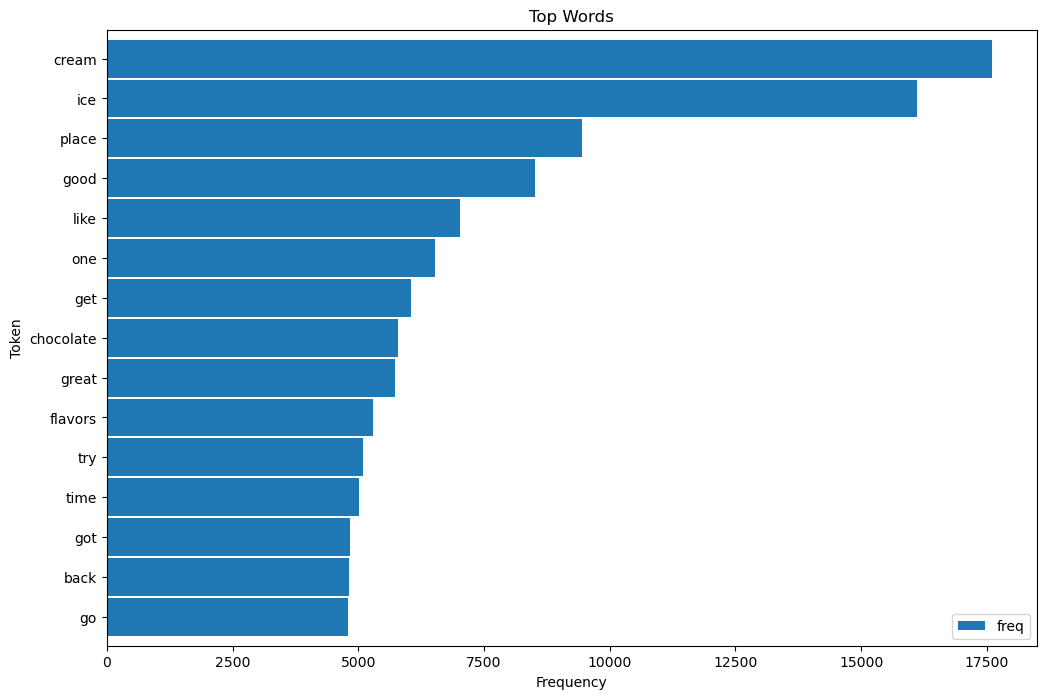

In [89]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')


In [90]:
!pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

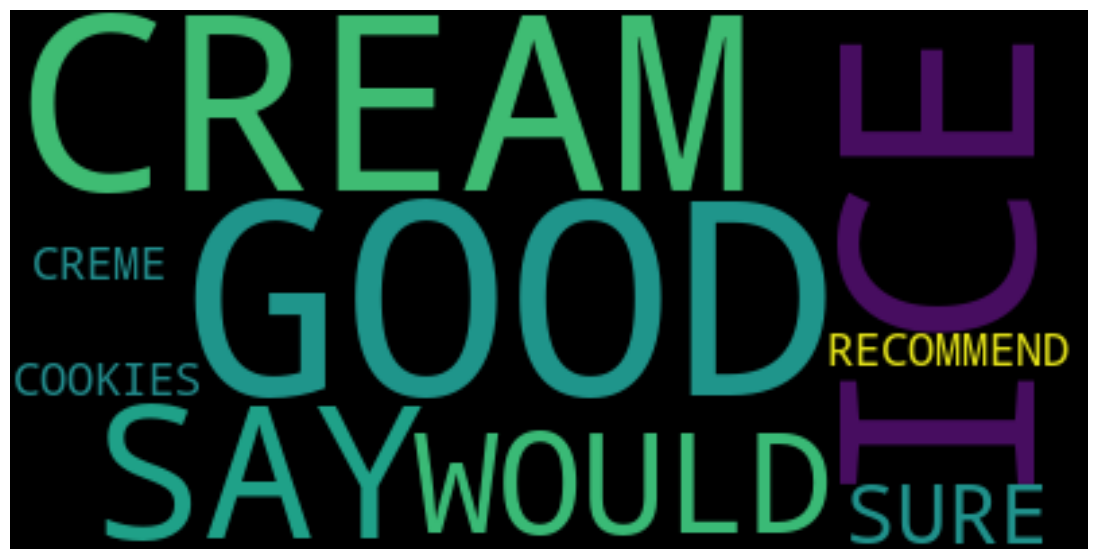

In [99]:
# Importing libraries wordcloud and matplotlib
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Printing output with the needy requirements
text = df['Review Text'].values[0]
plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

## All data Word cloud

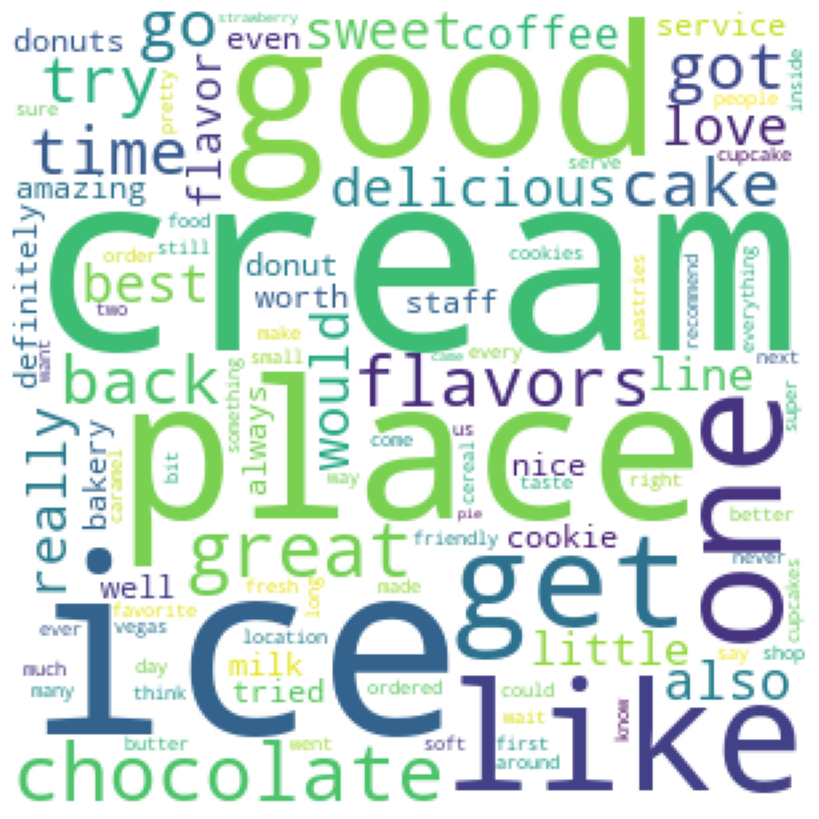

In [101]:
# Printing output with the needy requirements
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Random Strings

In [104]:
import re

# List of random strings
strings = [
    "john.doe@example.com",
    "2022-04-27",
    "(123) 456-7890",
    "https://www.example.com/path/to/resource",
    "C:\\Users\\John\\Documents\\file.txt"
]

# Regex patterns
regex_patterns = [
    r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',
    r'\b\d{4}-\d{2}-\d{2}\b',
    r'\b\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b',
    r'((https?://)?(?:www\.)?)([^/]+)(\/(.*))?',
    r'([a-zA-Z]:)?(\\[a-zA-Z_0-9.-]+)+\\?'
]

# Match strings with regex patterns
for i, string in enumerate(strings):
    match = re.match(regex_patterns[i], string)
    if match:
        print(f"String: {string} \nRegex: {regex_patterns[i]} \nResult: Match\n")
    else:
        print(f"String: {string} \nRegex: {regex_patterns[i]} \nResult: No match\n")


String: john.doe@example.com 
Regex: \b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b 
Result: Match

String: 2022-04-27 
Regex: \b\d{4}-\d{2}-\d{2}\b 
Result: Match

String: (123) 456-7890 
Regex: \b\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b 
Result: No match

String: https://www.example.com/path/to/resource 
Regex: ((https?://)?(?:www\.)?)([^/]+)(\/(.*))? 
Result: Match

String: C:\Users\John\Documents\file.txt 
Regex: ([a-zA-Z]:)?(\\[a-zA-Z_0-9.-]+)+\\? 
Result: Match



In [ ]:
## Sentimental analysis

In [108]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pbhar\AppData\Roaming\nltk_data...


True

In [109]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Sample Yelp reviews with ratings
reviews = [
    {"text": "All I can say is they have very good ice cream I would for sure recommend their cookies and creme ice cream it is very good", "rating": 5},
    {"text": "Nice little local place for ice cream.My favorite is their pumpkin shake ( Fall season special).( My Sweetness tolerance is low) Their LARGE SIZE ice cream usually seems too sweet after having ice cream for a while. But love their pina colada. So refreshing. Their Banana Split is good too.", "rating": 4},
    {"text": "A delicious treat on a hot day! Staff was very friendly and helpful-- gave us a sample and let us order a little earlier than open.", "rating": 5},
    {"text": "This was great service and a fun crew! I got the banana cream pie with chocolate ice cream. I loved the flavor of this. It had freshly cut bananas, graham crackers and chocolate ice cream. YUM!! The only thing that I noticed is that it melted pretty fast and it's a bit icy. I like creamier ice cream (so it had a bit more overrun that I prefer), but overall, was delicious!", "rating": 4},
    {"text": "This is one of my favorite places to get ice cream in the CU area. It's a bit of drive, but it is worth it. It's about 10 minutes from the far side of Urbana. Getting there is really easy. The atmosphere of the Dairy Barn is very kid friendly. There are many tables set up so that you can sit and enjoy the ice cream. When my friends and I went, the line was about a 20 minute wait, but it didn't seem like any time at all. An older gentlemen, I presume the manager or owner, was giving out samples to the entire line. You could tell that he took pride in the product he made and was excited to share it with everyone. The special that night was cappuccino ice cream. I added in cookie dough to make a \"tornado\" which is a blizzard like ice cream treat. It was so quite refreshing and was a nice treat on a humid night. The Dairy barn is a must go!", "rating": 5},
    {"text": "I've been coming to this ice cream stand since I was a little girl back in the 1970's. (Yes, it's been here for that long! Just not under the same ownership.) But not much has changed in those years in regards to their basic ice cream. It is a great family place! They are always accommodating when we want to tweak the menu item a bit :-) I love the rotating, special flavor of the week! Keep an eye on the Facebook page for that. It's always a joy to see the near constant long line. Shows how successful a small town business can be. If you are truly passionate about supporting small business, stay away from those franchises that make their ice cream at some corporate factory and come get some made fresh soft serve from your truly local business!!", "rating": 5}
]

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each review
for review in reviews:
    text = review["text"]
    rating = review["rating"]
    sentiment_score = sia.polarity_scores(text)
    print(f"Review: {text}")
    print(f"Rating: {rating}")
    print(f"Sentiment Score: {sentiment_score}")
    if sentiment_score["compound"] >= 0.05:
        print("Sentiment: Positive")
    elif sentiment_score["compound"] <= -0.05:
        print("Sentiment: Negative")
    else:
        print("Sentiment: Neutral")
    print()


Review: All I can say is they have very good ice cream I would for sure recommend their cookies and creme ice cream it is very good
Rating: 5
Sentiment Score: {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.8803}
Sentiment: Positive

Review: Nice little local place for ice cream.My favorite is their pumpkin shake ( Fall season special).( My Sweetness tolerance is low) Their LARGE SIZE ice cream usually seems too sweet after having ice cream for a while. But love their pina colada. So refreshing. Their Banana Split is good too.
Rating: 4
Sentiment Score: {'neg': 0.022, 'neu': 0.66, 'pos': 0.318, 'compound': 0.9509}
Sentiment: Positive

Review: A delicious treat on a hot day! Staff was very friendly and helpful-- gave us a sample and let us order a little earlier than open.
Rating: 5
Sentiment Score: {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.8803}
Sentiment: Positive

Review: This was great service and a fun crew! I got the banana cream pie with chocolate ice cream. I